In [2]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [100]:
data = pd.read_csv('/content/sample_data/nyc_taxi_trip_duration.csv')

In [101]:
data.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [102]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [103]:
data.shape

(729322, 11)

In [104]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [105]:
# converting strings to datetime features

data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)
data['dropoff_datetime'] = pd.to_datetime(data.dropoff_datetime)

In [106]:
data['day_of_week'] = data['pickup_datetime'].dt.weekday
data['hour_of_day'] = data['pickup_datetime'].dt.hour

In [107]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,day_of_week,hour_of_day
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000,729322.000000
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,3.049081,13.611698
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,1.954470,6.402853
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,0.000000,0.000000
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,1.000000,9.000000
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,3.000000,14.000000
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,5.000000,19.000000
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,6.000000,23.000000


**The most suitable evaluation metric for the given dataset is Mean Squared Error. As the formula for mean squared error is comprised of square of difference between the predicted value and acual value of target variable. Which will lead to the bigger error value and help us to detect the small errors.**

# **BENCHMARK MODEL**

In [108]:
#Shuffling and Creating Train and Test Set

from sklearn.utils import shuffle

# Shuffling the Dataset
data = shuffle(data, random_state = 42)

#creating 4 divisions
div = int(data.shape[0]/4)

# 3 parts to train set and 1 part to test set
train = data.loc[:3*div+1,:]
test = data.loc[3*div+1:]

In [109]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_week,hour_of_day
469114,id2380741,2,2016-05-21 10:40:14,2016-05-21 10:51:11,1,-73.981796,40.762035,-73.972267,40.781265,N,657,5,10
694852,id3946961,2,2016-01-08 18:49:27,2016-01-08 18:52:42,5,-73.980965,40.747677,-73.982704,40.741161,N,195,4,18
696324,id0833913,1,2016-05-22 00:54:10,2016-05-22 01:08:10,1,-73.951065,40.782722,-73.867691,40.833664,N,840,6,0
356496,id1336849,1,2016-06-11 10:32:12,2016-06-11 10:38:50,1,-73.987625,40.762791,-73.973518,40.762909,N,398,5,10
645318,id1610858,1,2016-04-03 10:45:51,2016-04-03 10:57:13,3,-73.964333,40.792503,-73.988609,40.758369,N,682,6,10


In [110]:
test.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_week,hour_of_day
546991,id2240736,1,2016-05-25 07:59:16,2016-05-25 08:05:02,1,-73.991364,40.732590,-74.000526,40.742283,N,346,2,7
43126,id1423404,1,2016-01-18 12:17:13,2016-01-18 12:21:13,2,-73.966225,40.768059,-73.967606,40.763073,N,240,0,12
641450,id1317268,2,2016-03-02 18:39:01,2016-03-02 18:50:12,1,-73.994926,40.766018,-74.004219,40.742523,N,671,2,18
611380,id3335546,1,2016-04-06 19:17:20,2016-04-06 19:18:03,1,-73.974388,40.793781,-73.976006,40.792339,N,43,2,19
62690,id2174190,2,2016-06-21 18:35:31,2016-06-21 18:40:56,3,-73.963440,40.798557,-73.979736,40.777878,N,325,1,18


In [111]:
 # Simple Mean ( mean of trip_duration)
# storing simple mean in a new column in the test set as "simple_mean"

test['simple_mean'] = train['trip_duration'].mean()

In [112]:
test['simple_mean']

546991    951.586402
43126     951.586402
641450    951.586402
611380    951.586402
62690     951.586402
             ...    
259178    951.586402
365838    951.586402
131932    951.586402
671155    951.586402
121958    951.586402
Name: simple_mean, Length: 139872, dtype: float64

In [113]:
#calculating mean absolute error
from sklearn.metrics import mean_absolute_error as MAE

simple_mean_error = MAE(test['trip_duration'] , test['simple_mean'])
simple_mean_error

621.9954570969938

In [114]:
 # Mean Trip Duration with respect to Day of Week
day_of_week = pd.pivot_table(train, values='trip_duration', index = ['day_of_week'], aggfunc=np.mean)
day_of_week


,trip_duration
day_of_week,
0,890.012810
1,984.251885
2,973.047004
3,1005.146720
4,989.699815
5,918.067036
6,888.431043


In [115]:
# initializing new column to zero
test['day_of_week_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['day_of_week'].unique():
  # Assign the mean value corresponding to unique entry
  test['day_of_week_mean'][test['day_of_week'] == i] = train['trip_duration'][train['day_of_week'] == i].mean()

In [116]:
#calculating mean absolute error
day_of_week_error = MAE(test['trip_duration'] , test['day_of_week_mean'] )
day_of_week_error


620.6622607467708

In [117]:
# Mean Trip Duration with respect to Hour of Day
hour_of_day = pd.pivot_table(train, values='trip_duration', index = ['hour_of_day'], aggfunc=np.mean)
hour_of_day

,trip_duration
hour_of_day,
0,982.268516
1,915.598624
2,853.385638
3,886.535977
4,890.512498
5,829.845634
6,726.336661
7,812.179002
8,937.732130


In [118]:
# initializing new column to zero
test['hour_of_day_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['hour_of_day'].unique():
  # Assign the mean value corresponding to unique entry
  test['hour_of_day_mean'][test['hour_of_day'] == i] = train['trip_duration'][train['hour_of_day'] == i].mean()

In [119]:
#calculating mean absolute error
hour_of_day_error = MAE(test['trip_duration'] , test['hour_of_day_mean'] )
hour_of_day_error

620.3242746375885

In [120]:
# Mean Trip Duration with respect to Vendor ID
vendor = pd.pivot_table(train, values='trip_duration', index = ['vendor_id'], aggfunc=np.mean)
vendor

,trip_duration
vendor_id,
1,838.174354
2,1049.946134


In [121]:
# initializing new column to zero
test['vendor_id_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['vendor_id'].unique():
  # Assign the mean value corresponding to unique entry
  test['vendor_id_mean'][test['vendor_id'] == i] = train['trip_duration'][train['vendor_id'] == i].mean()

In [122]:
#calculating mean absolute error
vendor_error = MAE(test['trip_duration'] , test['vendor_id_mean'] )
vendor_error

627.1274504364544

In [123]:
# Mean Trip Duration with respect to Passenger Count
passenger = pd.pivot_table(train, values='trip_duration', index = ['passenger_count'], aggfunc=np.mean)
passenger

,trip_duration
passenger_count,
0,334.733333
1,919.236280
2,1000.159939
3,1034.393923
4,1028.731304
5,1078.708147
6,1080.694100


In [124]:
# initializing new column to zero
test['passenger_count_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['passenger_count'].unique():
  # Assign the mean value corresponding to unique entry
  test['passenger_count_mean'][test['passenger_count'] == i] = train['trip_duration'][train['passenger_count'] == i].mean()

In [125]:
#calculating mean absolute error
passenger_error = MAE(test['trip_duration'] , test['passenger_count_mean'] )
passenger_error

622.5222915139927

In [126]:
# Mean Trip Duration with respect to both Vendor Id and Passenger Count
combo = pd.pivot_table(train, values = 'trip_duration', index = ['vendor_id','passenger_count'], aggfunc = np.mean)
combo

trip_duration
vendor_id passenger_count               
1         0                   514.625000
          1                   815.544883
          2                   932.030630
          3                   935.655634
          4                   966.265018
          5                   936.784722
          6                  1133.650000
2         0                   129.142857
          1                  1037.136612
          2                  1053.281189
          3                  1095.370941
          4                  1074.578032
          5                  1079.358240
          6                  1080.531284

In [127]:
# Initiating new empty column
test['Super_mean'] = 0

# Assigning variables to strings ( to shorten code length)
s1 = 'passenger_count'
s2 = 'vendor_id'
# For every Unique Value in s1
for i in test[s1].unique():
  # For every Unique Value in s2
  for j in test[s2].unique():
    # Calculate and Assign mean to new column, corresponding to both unique values of s1 and s2 simultaneously
    test['Super_mean'][(test[s1] == i) & (test[s2]==str(j))] = train['trip_duration'][(train[s1] == i) & (train[s2]==str(j))].mean()

In [128]:
#calculating mean absolute error
super_mean_error = MAE(test['trip_duration'] , test['Super_mean'] )
super_mean_error

954.9334105467856

# **K-Nearest Neighbour's Model**


In [5]:
data = pd.read_csv('/content/sample_data/nyc_taxi_trip_duration.csv')

In [6]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400.0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100.0
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635.0
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141.0
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848.0


In [7]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration         float64
dtype: object

In [8]:
# converting strings to datetime features

data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)
data['dropoff_datetime'] = pd.to_datetime(data.dropoff_datetime)

data['day_of_week'] = data['pickup_datetime'].dt.weekday
data['hour_of_day'] = data['pickup_datetime'].dt.hour

In [9]:
data['vendor_id'] = data['vendor_id'].astype('category')

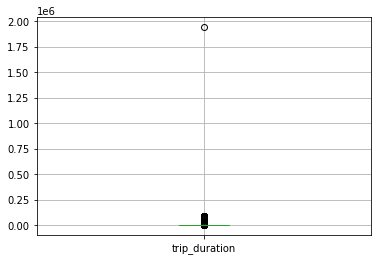

In [10]:
#OUTLIER DETECTION AND REMOVAL
# TRIP DURATION

data.boxplot(column = ['trip_duration'])
plt.show()

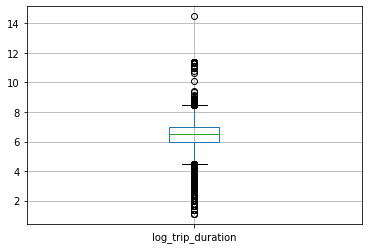

In [11]:
data['log_trip_duration'] = np.log(data['trip_duration'].values + 1)
data['log_trip_duration'] = data['log_trip_duration'].astype('float16')
data.boxplot(column = ['log_trip_duration'])
plt.show()

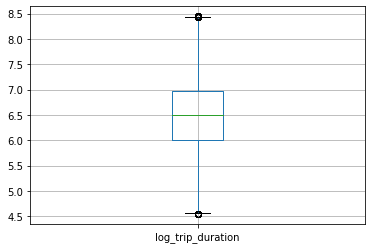

In [12]:
data = data.loc[(data.log_trip_duration > 4.53) & (data.log_trip_duration < 8.45)]
data.boxplot(column = ['log_trip_duration'])
plt.show()

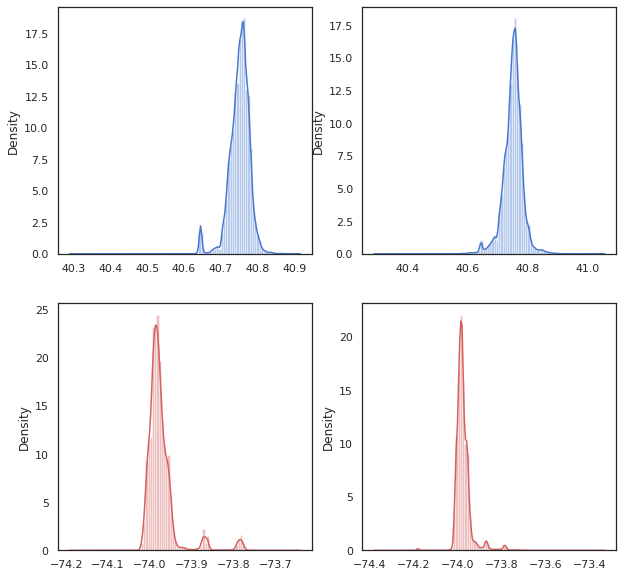

In [13]:
# Analysing Longitudes and Latitudes of the trips.

sns.set(style="white", palette="muted")
f, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 10), sharex = False, sharey = False)
sns.distplot(data['pickup_latitude'].values, label = 'pickup_latitude', color="b", bins = 100, ax=axes[0,0])
sns.distplot(data['pickup_longitude'].values, label = 'pickup_longitude', color="r", bins =100, ax=axes[1,0])
sns.distplot(data['dropoff_latitude'].values, label = 'dropoff_latitude', color="b", bins =100, ax=axes[0,1])
sns.distplot(data['dropoff_longitude'].values, label = 'dropoff_longitude', color="r", bins =100, ax=axes[1,1])
plt.show()

In [14]:
# Removing Outliers

data = data.loc[(data.pickup_latitude > 40.6) & (data.pickup_latitude < 40.9)]
data = data.loc[(data.dropoff_latitude>40.6) & (data.dropoff_latitude < 40.9)]
data = data.loc[(data.dropoff_longitude > -74.05) & (data.dropoff_longitude < -73.7)]
data = data.loc[(data.pickup_longitude > -74.05) & (data.pickup_longitude < -73.7)]

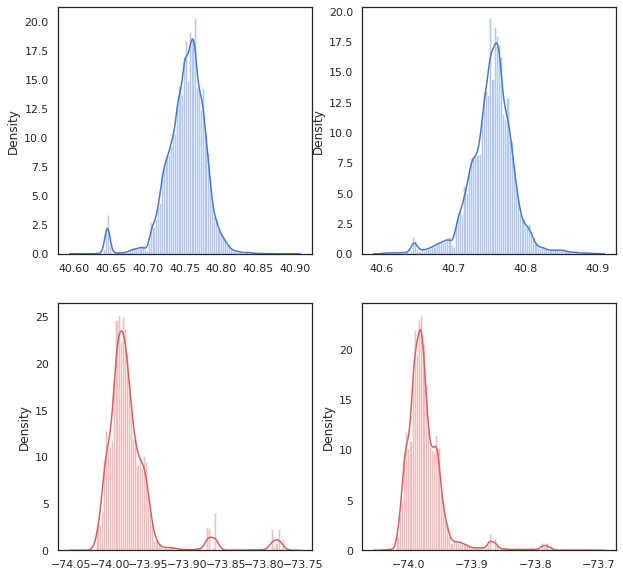

In [15]:
# Visualisation after removing outliers

sns.set(style="white", palette="muted")
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.distplot(data['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0, 0])
sns.distplot(data['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[1, 0])
sns.distplot(data['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[0, 1])
sns.distplot(data['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1, 1])
plt.show()

In [16]:
data = pd.get_dummies(data.drop(['trip_duration', 'pickup_datetime', 'dropoff_datetime', 'id'], axis = 1))

In [129]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_week,hour_of_day
469114,id2380741,2,2016-05-21 10:40:14,2016-05-21 10:51:11,1,-73.981796,40.762035,-73.972267,40.781265,N,657,5,10
694852,id3946961,2,2016-01-08 18:49:27,2016-01-08 18:52:42,5,-73.980965,40.747677,-73.982704,40.741161,N,195,4,18
696324,id0833913,1,2016-05-22 00:54:10,2016-05-22 01:08:10,1,-73.951065,40.782722,-73.867691,40.833664,N,840,6,0
356496,id1336849,1,2016-06-11 10:32:12,2016-06-11 10:38:50,1,-73.987625,40.762791,-73.973518,40.762909,N,398,5,10
645318,id1610858,1,2016-04-03 10:45:51,2016-04-03 10:57:13,3,-73.964333,40.792503,-73.988609,40.758369,N,682,6,10


In [18]:
#seperating independent and dependent variables

#features
x = data.drop(['log_trip_duration'], axis=1)

#target
y = data['log_trip_duration']

x.shape, y.shape

((46155, 11), (46155,))

In [19]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [20]:
x = pd.DataFrame(x_scaled, columns = x.columns)
x.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,day_of_week,hour_of_day,vendor_id_1,vendor_id_2,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,0.166667,0.313021,0.597563,0.232422,0.574105,0.000000,0.695652,0.0,1.0,1.0,0.0
1,0.333333,0.186951,0.436705,0.141568,0.318156,0.666667,1.000000,1.0,0.0,1.0,0.0
2,0.333333,0.153952,0.401604,0.279050,0.586708,1.000000,0.739130,0.0,1.0,1.0,0.0
3,1.000000,0.284608,0.532191,0.253300,0.605881,0.166667,0.391304,0.0,1.0,1.0,0.0
4,0.166667,0.081352,0.357272,0.160897,0.471593,0.333333,0.260870,1.0,0.0,1.0,0.0


In [21]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [22]:
#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [23]:
def Elbow(K):
  #initiating empty list
    test_mse = []
  
  #training model for every value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = mse(tmp,test_y)
        test_mse.append(tmp)
    
    return test_mse

In [24]:
# Defining K range
k = range(1, 201, 10)

In [25]:
test_calc = Elbow(k)

In [26]:
test_calc

[0.3845,
 0.2598,
 0.2764,
 0.2913,
 0.302,
 0.31,
 0.317,
 0.3237,
 0.3296,
 0.335,
 0.3398,
 0.3445,
 0.3486,
 0.3525,
 0.356,
 0.359,
 0.3618,
 0.3643,
 0.3667,
 0.3687]

Text(0.5, 1.0, 'Elbow Curve for test')

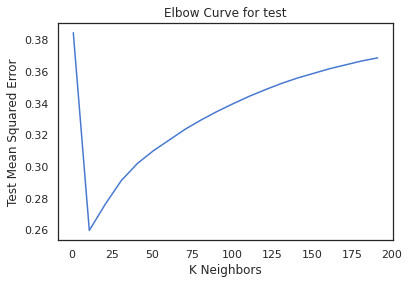

In [27]:
# Plotting the Curves
plt.plot(k, test_calc)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

Taking all the values between 1 and 20.

In [28]:
# Defining K range
k = range(1, 20)

In [29]:
test_calc_new = Elbow(k)


Text(0.5, 1.0, 'Elbow Curve for test')

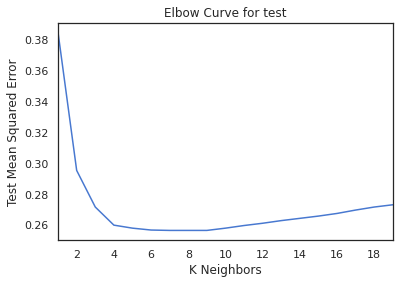

In [30]:
# Plotting the Curves
plt.plot(k, test_calc_new)
plt.xlim(1, 19)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

In [31]:
# Creating instance of KNN
reg = KNN(n_neighbors = 8)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MSE
train_predict = reg.predict(train_x)
test_predict = reg.predict(test_x)
k_train_knn = mse(train_predict, train_y)
k_test_knn = mse(test_predict, test_y)
print('Train MSE    ', k_train_knn )
print('Test MSE     ', k_test_knn)

Train MSE     0.1992
Test MSE      0.2566


# **Linear model for the given dataset with regularisation.**

In [32]:
data.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,day_of_week,hour_of_day,log_trip_duration,vendor_id_1,vendor_id_2,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,1,-73.953918,40.778873,-73.963875,40.771164,0,16,5.992188,0,1,1,0
1,2,-73.988312,40.731743,-73.994751,40.694931,4,23,7.003906,1,0,1,0
2,2,-73.997314,40.721458,-73.948029,40.774918,6,17,7.398438,0,1,1,0
3,6,-73.961670,40.759720,-73.956779,40.780628,1,9,7.039062,0,1,1,0
4,1,-74.017120,40.708469,-73.988182,40.740631,2,6,6.742188,1,0,1,0


In [45]:
data.shape

(46155, 12)

In [33]:
# seperating independent and dependent variables

# Features
x = data.drop(['log_trip_duration'], axis=1)

# Target
y = data['log_trip_duration']

x.shape, y.shape

((46155, 11), (46155,))

In [34]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [35]:
# Implementing Linear Regression
from sklearn.linear_model import LinearRegression

In [36]:
train_error_reg = []
test_error_reg = []

lr = LinearRegression(normalize=True)

train_x_array = np.array(train_x)
train_y_array = np.array(train_y)
test_x_array = np.array(test_x)
test_y_array = np.array(test_y)

for i in range(1, 12):
    lr.fit(train_x_array[:, 0:i], train_y)
    train_y_pred = lr.predict(train_x_array[:, 0:i])
    test_y_pred = lr.predict(test_x_array[:, 0:i])
    
    mrss_train = sum((train_y_pred-train_y)**2)/train_x_array[:, 0:i].shape[0]
    mrss_test = sum((test_y_pred-test_y)**2)/test_x_array[:, 0:i].shape[0]
    
    train_error_reg.append(mrss_train)
    test_error_reg.append(mrss_test)

In [37]:
# Initializing the dataframe to store error

col = ['train_error_reg','test_error_reg']
ind = ['Number_of_variable_%d'%i for i in range(1, train_x.shape[1]+1)]
matrix_reg = pd.DataFrame(index=ind, columns=col)

In [38]:
matrix_reg['train_error_reg'] = train_error_reg
matrix_reg['test_error_reg'] = test_error_reg
matrix_reg

,train_error_reg,test_error_reg
Number_of_variable_1,0.500749,0.485015
Number_of_variable_2,0.471794,0.456064
Number_of_variable_3,0.459017,0.446567
Number_of_variable_4,0.445598,0.435604
Number_of_variable_5,0.438605,0.429508
Number_of_variable_6,0.438037,0.429169
Number_of_variable_7,0.436875,0.428533
Number_of_variable_8,0.436871,0.428523
Number_of_variable_9,0.436871,0.428523
Number_of_variable_10,0.436846,0.428409


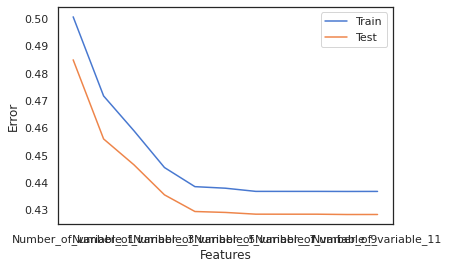

In [39]:
# Plotting the Features VS Error curve

matrix_reg[['train_error_reg','test_error_reg']].plot()
plt.xlabel('Features')
plt.ylabel('Error')
plt.legend(['Train', 'Test'])
plt.show()

In [40]:
# Parameters of Linear Regression
lr.coef_


array([ 7.93541898e-03,  3.50202931e+00, -3.08137064e+00,  3.81298410e+00,
       -3.03576722e+00, -1.07513711e-02,  5.39594463e-03,  4.93694873e+11,
        4.93694873e+11,  1.92370520e+13,  1.92370520e+13])

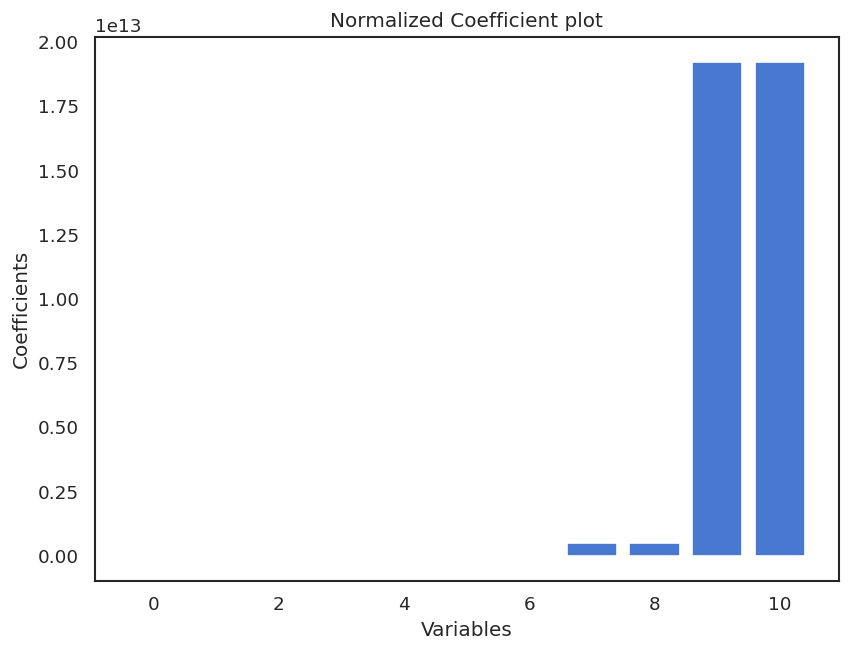

In [41]:
#  Plotting the coefficients
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel("Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')
plt.show()

In [42]:
# Creating new subsets of data
# Seperating independent and dependent variables
x = data.drop(['log_trip_duration'], axis=1)
y = data['log_trip_duration']
x.shape, y.shape

((46155, 11), (46155,))

In [43]:
 # Arranging coefficients with features
Coefficients = pd.DataFrame({
    'Variable'    : x.columns,
    'coefficient' : lr.coef_
})
Coefficients.head()

,Variable,coefficient
0,passenger_count,0.007935
1,pickup_longitude,3.502029
2,pickup_latitude,-3.081371
3,dropoff_longitude,3.812984
4,dropoff_latitude,-3.035767


In [46]:
sig_var = Coefficients[Coefficients.coefficient > 0.5]

In [47]:
# Extracting the significant subset do independent Variables
subset = data[sig_var['Variable'].values]
subset.head()


,pickup_longitude,dropoff_longitude,vendor_id_1,vendor_id_2,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,-73.953918,-73.963875,0,1,1,0
1,-73.988312,-73.994751,1,0,1,0
2,-73.997314,-73.948029,0,1,1,0
3,-73.961670,-73.956779,0,1,1,0
4,-74.017120,-73.988182,1,0,1,0


In [48]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(subset, y , random_state = 56)

In [49]:
# Importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [50]:
# Creating instance of Linear Regresssion with Normalised Data
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)


LinearRegression(normalize=True)

In [51]:
train_y_pred = lr.predict(train_x)
test_y_pred = lr.predict(test_x)
    
mrss_train_regression = sum((train_y_pred-train_y)**2)/train_x.shape[0]
mrss_test_regression = sum((test_y_pred-test_y)**2)/test_x.shape[0]

print('Train Error : ', mrss_train_regression)
print('Test Error  : ', mrss_test_regression)

Train Error :  0.4634581288813112
Test Error  :  0.4487890773634014


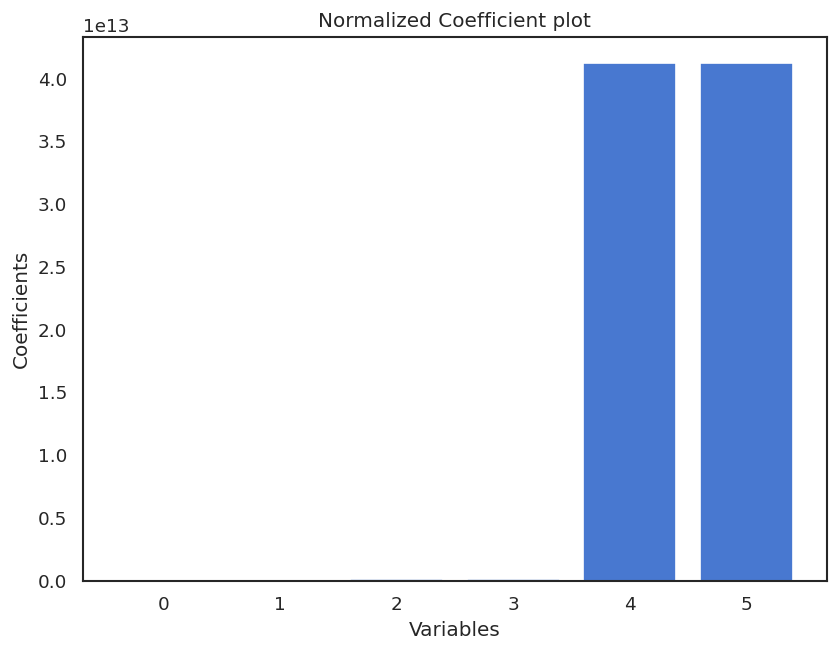

In [52]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
columns = range(len(train_x.columns))
coef = lr.coef_
plt.bar(columns, coef)
plt.xlabel("Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')
plt.show()

In [53]:
#Regularisation  Ridge
# Importing ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge

In [54]:
# Setting the different values of alpha to be tested
alpha_ridge = [0, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 25]

In [55]:
train_error_ridge = []
test_error_ridge = []

for i in alpha_ridge:
    
    R = Ridge(alpha = i, normalize=True)
    R.fit(train_x, train_y)
    train_y_pred = R.predict(train_x)
    test_y_pred = R.predict(test_x)
    
    mrss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    mrss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    
    train_error_ridge.append(mrss_train)
    test_error_ridge.append(mrss_test)

In [56]:
R.coef_

array([ 0.17466372,  0.16230305, -0.00043593,  0.00043593, -0.00535226,
        0.00535226])

In [57]:
# Initializing the dataframe to store error

col = ['train_error_ridge','test_error_ridge']
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
matrix_ridge = pd.DataFrame(index=ind, columns=col)

In [58]:
matrix_ridge['train_error_ridge'] = train_error_ridge
matrix_ridge['test_error_ridge'] = test_error_ridge
matrix_ridge

,train_error_ridge,test_error_ridge
alpha_0,0.461209,0.447231
alpha_1e-08,0.461209,0.447231
alpha_0.0001,0.461209,0.447231
alpha_0.001,0.461209,0.447231
alpha_0.01,0.461212,0.447233
alpha_1,0.469075,0.454737
alpha_5,0.486626,0.471520
alpha_10,0.492588,0.477221
alpha_20,0.496393,0.480860
alpha_25,0.497237,0.481667


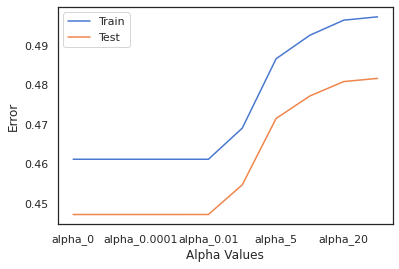

In [59]:
# Plotting the Alpha Values VS Error graph

matrix_ridge[['train_error_ridge','test_error_ridge']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('Error')
plt.legend(['Train', 'Test'])
plt.show()

In [60]:
matrix_ridge.min()[0]

0.461209042767671

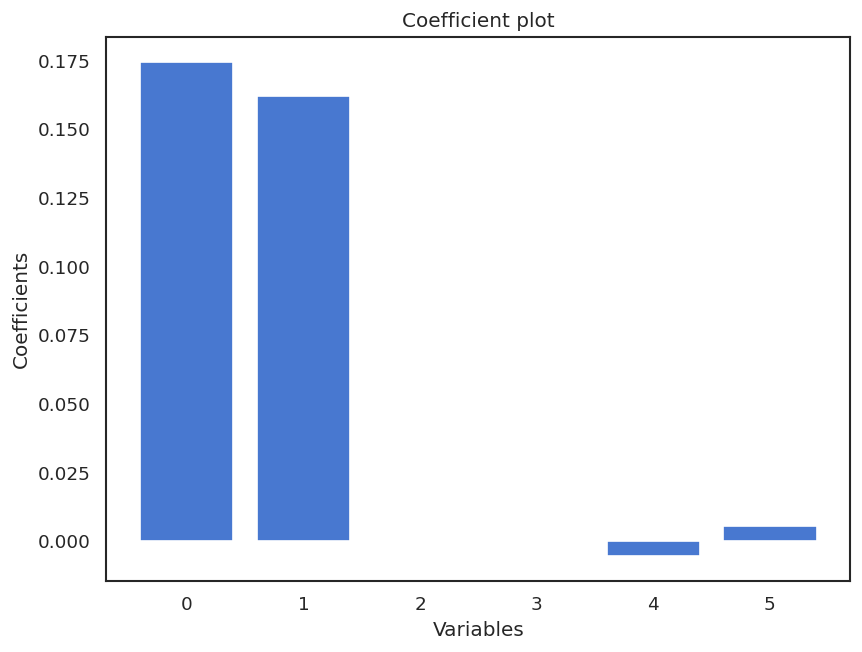

In [61]:
# Interpreting the coefficients
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = R.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')
plt.show()

Interpretation from the linear variable Coefficients -
The above coefficient is normalized which can be used for making final inferences out of it.
From the above coefficient plot, we can interpret that 2 of the variables are mostly contributing in the linear model while rest a=do not have any major impact on the ridge regression model.

In [62]:
# Lasso
# Importing Lasso model from sklearn's linear_model module
from sklearn.linear_model import Lasso

In [63]:
# Definining the alpha values to test
alpha_lasso = [0, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

In [64]:
train_error_lasso = []
test_error_lasso = []

for i in alpha_lasso:
    
    L = Lasso(alpha = i, normalize=True)
    L.fit(train_x, train_y)
    train_y_pred = L.predict(train_x)
    test_y_pred = L.predict(test_x)
    
    mrss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    mrss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    
    train_error_lasso.append(mrss_train)
    test_error_lasso.append(mrss_test)

In [65]:
# Initializing the dataframe to store error

col = ['train_error_lasso','test_error_lasso']
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
matrix_lasso = pd.DataFrame(index=ind, columns=col)


In [66]:
matrix_lasso['train_error_lasso'] = train_error_lasso
matrix_lasso['test_error_lasso'] = test_error_lasso
matrix_lasso

,train_error_lasso,test_error_lasso
alpha_0,0.461209,0.447231
alpha_1e-10,0.461209,0.447231
alpha_1e-08,0.461209,0.447231
alpha_1e-05,0.461222,0.447262
alpha_0.0001,0.461797,0.447839
alpha_0.001,0.500939,0.485208
alpha_0.01,0.500939,0.485208
alpha_1,0.500939,0.485208
alpha_5,0.500939,0.485208
alpha_10,0.500939,0.485208


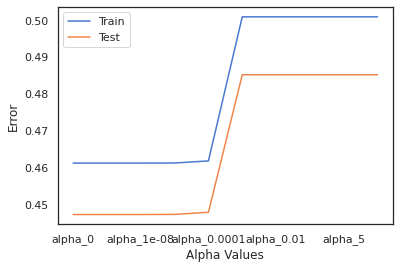

In [67]:
# Plotting the Alpha Values VS Error graph

matrix_lasso[['train_error_lasso','test_error_lasso']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('Error')
plt.legend(['Train', 'Test'])
plt.show()

In [68]:
matrix_lasso.min()

train_error_lasso    0.461209
test_error_lasso     0.447231
dtype: float64

In [69]:
#Plotting the coefficients
L.coef_

array([ 0.,  0., -0.,  0., -0.,  0.])

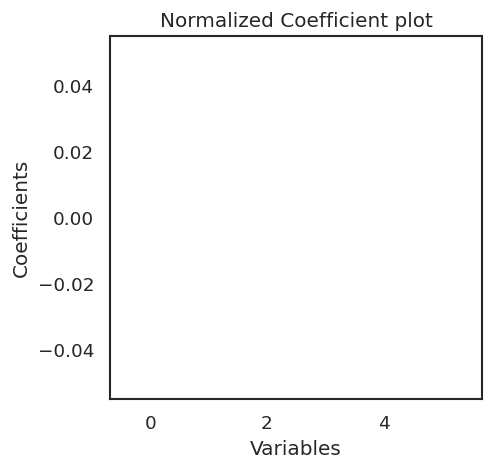

In [70]:
plt.figure(figsize=(4, 4), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = L.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')
plt.show()

Interpretation from the linear variable Coefficients -
The above coefficient is normalized which can be used for making final inferences out of it.
From the above coefficient plot, we can interpret that none of the variables are contributing in the lasso modeling.



# **Decision tree model**

In [71]:
# Seperating independent and dependent variables

# Features
x = data.drop(['log_trip_duration'], axis=1)

# Target
y = data['log_trip_duration']

x.shape, y.shape

((46155, 11), (46155,))

In [72]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56, test_size = 0.25)

In [73]:
# Implementing Decision Tree Regressor
# Importing decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [74]:
# Creating the decision tree function
dt_model = DecisionTreeRegressor(random_state=10)

In [76]:
# Fitting the model
dt_model.fit(train_x, train_y)

DecisionTreeRegressor(random_state=10)

In [77]:
# Checking the training score
dt_model.score(train_x, train_y)

1.0

In [78]:
# Checking the test score
dt_model.score(test_x, test_y)

0.4214956868851558

In [79]:
# Predictions on test set
y_pred = dt_model.predict(test_x)

In [80]:
# Changing the max_depth
train_accuracy = []
test_accuracy = []
for depth in range(1,30):
    dt_model = DecisionTreeRegressor(max_depth=depth, random_state=10)
    dt_model.fit(train_x, train_y)
    train_accuracy.append(dt_model.score(train_x, train_y))
    test_accuracy.append(dt_model.score(test_x, test_y))

In [81]:
frame = pd.DataFrame({'max_depth':range(1,30), 'train_acc':train_accuracy, 'test_acc':test_accuracy})
frame

,max_depth,train_acc,test_acc
0,1,0.097795,0.098541
1,2,0.176739,0.171266
2,3,0.219534,0.207139
3,4,0.277034,0.263500
4,5,0.309684,0.295691
5,6,0.334538,0.316848
6,7,0.413847,0.392379
7,8,0.442367,0.416568
8,9,0.488297,0.455378
9,10,0.526406,0.475517


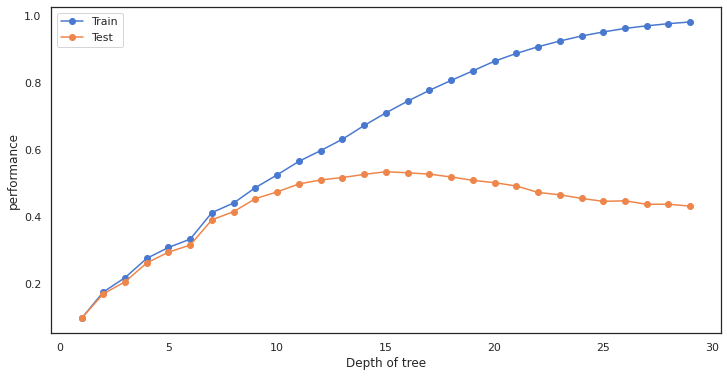

In [82]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['test_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend(['Train', 'Test'])
plt.show()

In [83]:
dt_model = DecisionTreeRegressor(max_depth=18, max_leaf_nodes=80, random_state=10)

In [84]:
# Fitting the model
dt_model.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=18, max_leaf_nodes=80, random_state=10)

In [85]:
# Training score
dt_model.score(train_x, train_y)

0.5226579618269861

In [86]:
# Test score
dt_model.score(test_x, test_y)

0.49890560714053733

In [87]:
from sklearn import tree

In [88]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=train_x.columns,max_depth=2,filled=True)

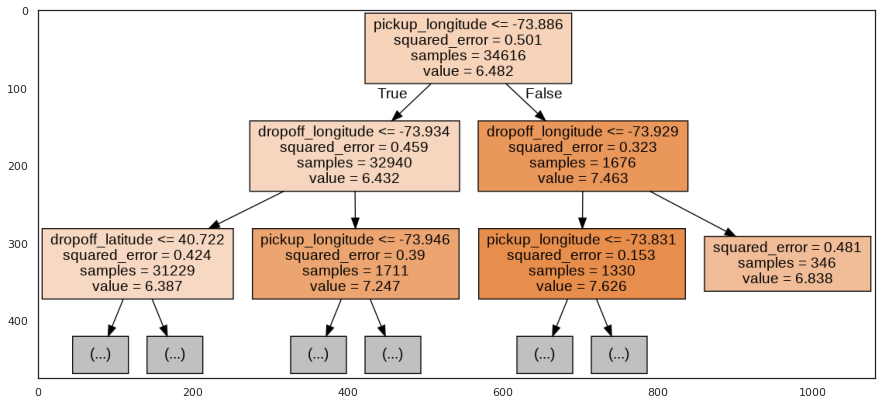

In [91]:
image = plt.imread('tree.png')
plt.figure(figsize=(15, 40))
plt.imshow(image)
plt.show()

From the above decision tree model, it can be interpreted that the variable pickup_longitude is the most suitable root node because after splitting, reduction in varience, i.e., MSE, of the child nodes is least compared to other variables after the split.

In [92]:
# Collecting scores from the models and putting them in respective variables.

# KNN
a = (1 - k_train_knn)*100
b = (1 - k_test_knn)*100

# Linear Regression
c = (1 - mrss_train_regression)*100
d = (1 - mrss_test_regression)*100

# Ridge Regression
e = (1 - matrix_ridge.min()[0])*100
f = (1 - matrix_ridge.min()[1])*100

# Lasso Regression
g = (1 - matrix_lasso.min()[0])*100
h = (1 - matrix_lasso.min()[1])*100

# Decision Tree
i = (dt_model.score(train_x, train_y))*100
j = (dt_model.score(test_x, test_y))*100

In [93]:
# Train Error Bar plot
train_error_name = ['Train Score KNN',
                    'Train Score Linear Regression',
                    'Train Score Ridge',
                    'Train Score Lasso',
                    'Train Score Decision Tree']
score_train = [a, c, e, g, i]

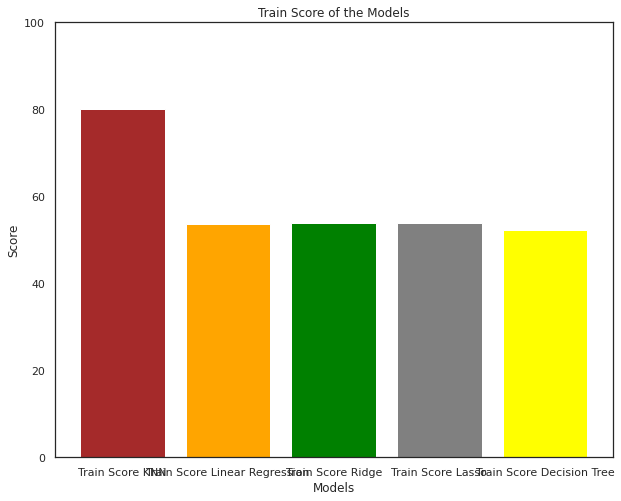

In [96]:
plt.figure(figsize = (10, 8))
plt.ylim(0, 100)
plt.bar(train_error_name, score_train, color=['brown', 'orange', 'green', 'grey', 'yellow'])
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Train Score of the Models');

From the above bar plot it can be observed that the train score of KNN model has the best score among all of the other models.

In [98]:
# Test error Bar plot
test_error_name = ['Test Score KNN',
                   'Test Score Linear Regression',
                   'Test Score Ridge',
                   'Test Score Lasso',
                   'Test Score Decision Tree']
score_test = [b, d, f, h, j]

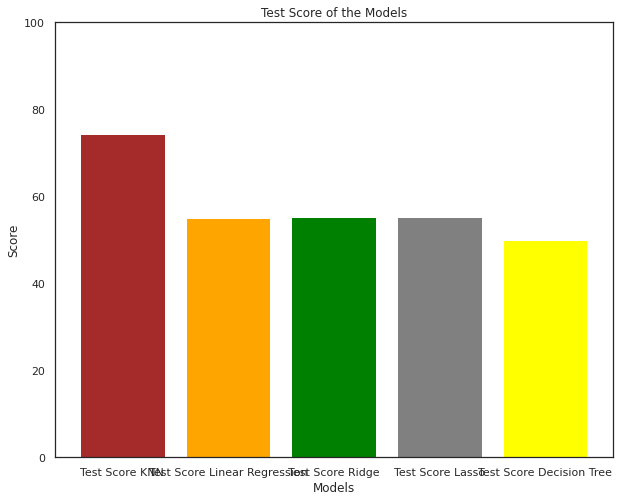

In [99]:
plt.figure(figsize = (10, 8))
plt.ylim(0, 100)
plt.bar(test_error_name, score_test, color=['brown', 'orange', 'green', 'grey', 'yellow'])
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Test Score of the Models');

From the above test score bar plot, KNN model is performing best with least test error and better score among all the other models.

**From the above bar plots, it can be seen that both the train and test score of all models are in sync with each other and out of all these models, K-Nearest Neighbor model is performing better than the other models.**